In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [10, 5]

In [30]:
background_data = np.loadtxt('bacckground.csv',delimiter = ',', skiprows = 1)
mercury_data = np.loadtxt('mercury.csv',delimiter = ',', skiprows = 1)
hydrogen_data  = np.loadtxt('hydrogen.csv',delimiter = ',', skiprows = 1)
deuterium_data = np.loadtxt('deut2.csv',delimiter = ',', skiprows = 1)
sodium_data = np.loadtxt('sodium.csv',delimiter = ',', skiprows = 1)
n2_data = np.loadtxt('n2.csv',delimiter = ',', skiprows = 1)

wl = background_data[:,0]
background = background_data[:,1]

hg1 = mercury_data[:,1]
hg2 = mercury_data[:,2]
hg3 = mercury_data[:,3]

h21 = hydrogen_data[:,1]
h22 = hydrogen_data[:,2]
h23 = hydrogen_data[:,3]

h31 = deuterium_data[:,1]
h32 = deuterium_data[:,2]
h33 = deuterium_data[:,3]

na1 = sodium_data[:,1]
na2 = sodium_data[:,2]
na3 = sodium_data[:,3]

n21 = n2_data[:,1]
n22 = n2_data[:,2]
n23 = n2_data[:,3]

In [31]:
hg = np.empty(len(wl))
h2 = np.empty(len(wl))
h3 = np.empty(len(wl))
na = np.empty(len(wl))
n2 = np.empty(len(wl))

for i in range(len(wl)):
    hg[i] = (hg1[i]+hg2[1]+hg3[i])/3
    h2[i] = (h21[i]+h22[i]+h23[i])/3
    h3[i] = (h31[i]+h32[i]+h33[i])/3
    na[i] = (na1[i]+na2[i]+na3[i])/3
    n2[i] = (n21[i]+n22[i]+n23[i])/3
    


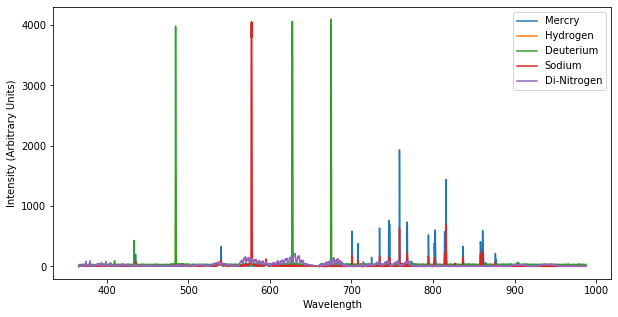

In [32]:
plt.plot(wl,hg,label = 'Mercry')
plt.plot(wl,h2,label = 'Hydrogen')
plt.plot(wl,h3,label = 'Deuterium')
plt.plot(wl,na,label = 'Sodium')
plt.plot(wl,n2,label = 'Di-Nitrogen')
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Intensity (Arbitrary Units)")
plt.show()

## Mercury

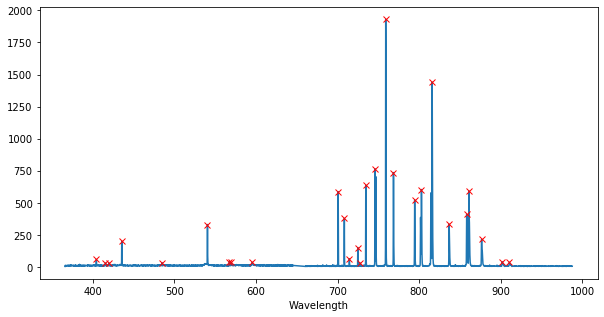

27


In [33]:
peaks, _ = find_peaks(hg, prominence = 20,distance = 10)

plt.plot(wl,hg)
plt.plot(wl[peaks],hg[peaks],'x',color = 'r')
plt.xlabel("Wavelength")
plt.show()

print(len(hg[peaks]))

In [34]:
mercury_peak = np.empty([len(hg[peaks]),2])

for i in range(len(hg[peaks])):
    mercury_peak[i,0] = wl[peaks][i]
    mercury_peak[i,1] = hg[peaks][i]
    
print(mercury_peak)

[[ 404.17         57.66666667]
 [ 415.44         30.33333333]
 [ 419.63         31.66666667]
 [ 435.51        200.33333333]
 [ 484.65         32.66666667]
 [ 540.44        330.33333333]
 [ 567.25         40.66666667]
 [ 569.02         37.66666667]
 [ 595.15         35.66666667]
 [ 700.63        586.        ]
 [ 708.2         377.66666667]
 [ 714.33         63.33333333]
 [ 724.71        150.66666667]
 [ 727.13         31.66666667]
 [ 734.47        636.66666667]
 [ 745.81        764.66666667]
 [ 758.9        1930.33333333]
 [ 768.37        735.33333333]
 [ 794.4         522.66666667]
 [ 802.65        603.33333333]
 [ 815.85       1441.33333333]
 [ 836.54        333.33333333]
 [ 858.12        410.66666667]
 [ 860.87        592.66666667]
 [ 876.47        215.33333333]
 [ 901.67         39.66666667]
 [ 910.48         35.66666667]]


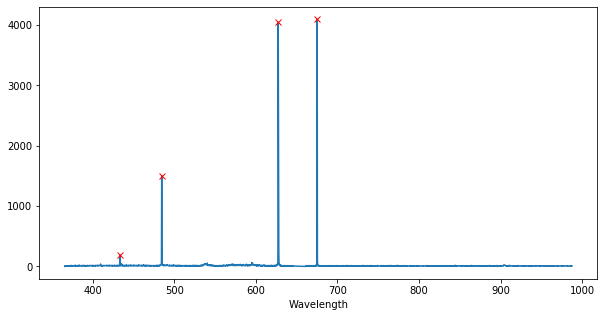

4


In [35]:
peaks1, _ = find_peaks(h2, prominence = 60)

plt.plot(wl,h2)
plt.plot(wl[peaks1],h2[peaks1],'x',color = 'r')
plt.xlabel('Wavelength')
plt.show()

print(len(h2[peaks1]))

In [36]:
hydrogen_peak = np.empty([4,2])

for i in range(4):
    hydrogen_peak[i,0] = wl[peaks1][i]
    hydrogen_peak[i,1] = h2[peaks1][i]
    
print(hydrogen_peak)

[[ 433.63        190.        ]
 [ 484.65       1503.66666667]
 [ 627.37       4043.66666667]
 [ 675.15       4095.        ]]


0.21 2306113.5069068098
0.1875 2063344.681729083
0.1388888888888889 1593955.7199101008
Slope = 9957273.575105693 . Intercept = 207480.99955321083
[[ 7.34268770e+10 -1.31284538e+10]
 [-1.31284538e+10  2.41198422e+09]]


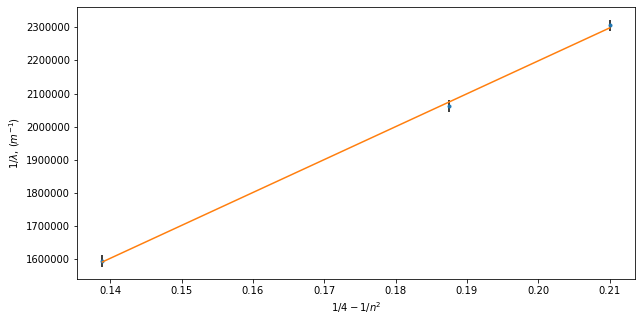

90.7373532262851


In [68]:
def rydfunc(n):
    return (1/4 - 1/(n**2))

def linf(x,a,b):
    return a*x + b

lambda_inv = np.empty(3)
balmer = np.empty(3)

for i in range(3):
    balmer[i] = rydfunc(5-i)
    lambda_inv[i] = 1/(hydrogen_peak[i,0]*1e-9)
    print(balmer[i],lambda_inv[i])
    

c1,cov1 = curve_fit(linf,balmer,lambda_inv)
yopt = linf(balmer,c1[0],c1[1])
    
print('Slope =',c1[0],'. Intercept =', c1[1])
print(cov1)
errh = 7.3426e3 * 2.412
    
plt.plot(balmer,lambda_inv,'.')
plt.plot(balmer,yopt)
plt.errorbar(balmer,lambda_inv, ecolor = "k", yerr = errh, linestyle = 'none' )
plt.xlabel('$ 1/4 - 1/n^2 $')
plt.ylabel('$ 1/ \lambda $, ($m^{-1}$)')
plt.show()

print(9957273.575105693/10973731.568160 * 100)

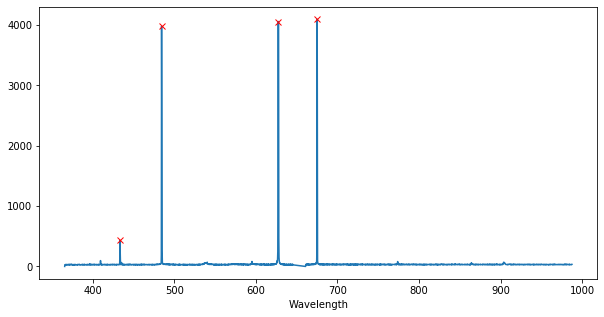

4


In [38]:
peaks2, _ = find_peaks(h3, prominence = 80)

plt.plot(wl,h3)
plt.plot(wl[peaks2],h3[peaks2],'x',color = 'r')
plt.xlabel('Wavelength')
plt.show()
print(len(h3[peaks2]))

In [39]:
deuterium_peak = np.empty([4,2])

for i in range(4):
    deuterium_peak[i,0] = wl[peaks2][i]
    deuterium_peak[i,1] = h3[peaks2][i]
    
print(deuterium_peak)

[[ 433.46        432.        ]
 [ 484.49       3981.33333333]
 [ 627.46       4058.        ]
 [ 675.06       4095.        ]]


0.21 2307017.94859964
0.1875 2064026.0892897686
0.1388888888888889 1593727.0901730785
Slope = 9973653.625262516 . Intercept = 205004.714140141


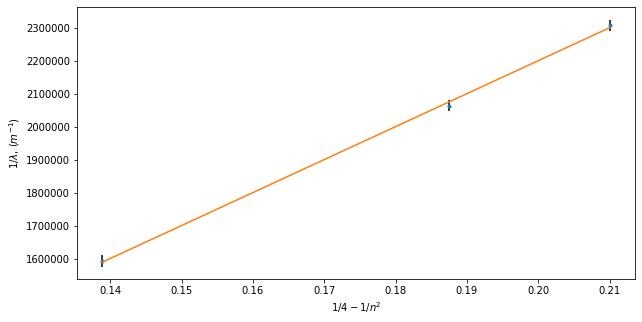

0.9983576680349784
[[ 7.22904142e+10 -1.29252577e+10]
 [-1.29252577e+10  2.37465249e+09]]


In [65]:
lambda_invd = np.empty(3)
balmerd = np.empty(3)

for i in range(3):
    balmerd[i] = rydfunc(5-i)
    lambda_invd[i] = 1/(deuterium_peak[i,0]*1e-9)
    print(balmerd[i],lambda_invd[i])
    

c2,cov2 = curve_fit(linf,balmerd,lambda_invd)
yoptd = linf(balmerd,c2[0],c2[1])
    
print('Slope =',c2[0],'. Intercept =', c2[1])

err = 7.22e3 * 2.37
    
plt.plot(balmerd,lambda_invd,'.')
plt.plot(balmerd,yoptd)
plt.errorbar(balmerd,lambda_invd, ecolor = "k", yerr = err, linestyle = 'none' )
plt.xlabel('$ 1/4 - 1/n^2 $')
plt.ylabel('$ 1/ \lambda $, ($m^{-1}$)')
plt.show()

print(c1[0]/c2[0])
print(cov2)




In [41]:
diff = []

for i in range(3): #this finds the difference between the wl of peaks of h2 and h3
    diff.append(wl[peaks1][i]-wl[peaks2][i])
    
print(diff)

halfmmp = []

for i in range(3): #this will give us the m/2mp value
    halfmmp.append(abs(diff[i]/wl[peaks1][i] * 2))
    
print(halfmmp)
print('')
    
print(np.average(halfmmp))
print(np.std(halfmmp))


[0.17000000000001592, 0.15999999999996817, -0.09000000000003183]
[0.0007840785923483888, 0.0006602702981531751, 0.00028691202958391963]

0.0005770869733618278
0.00021131847517474075


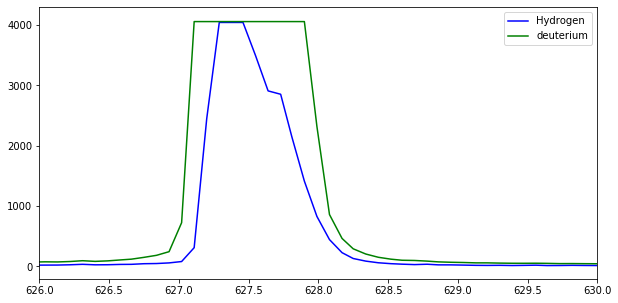

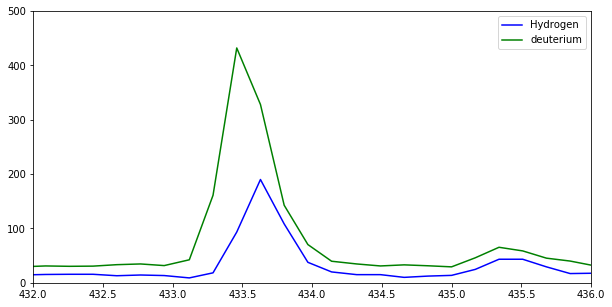

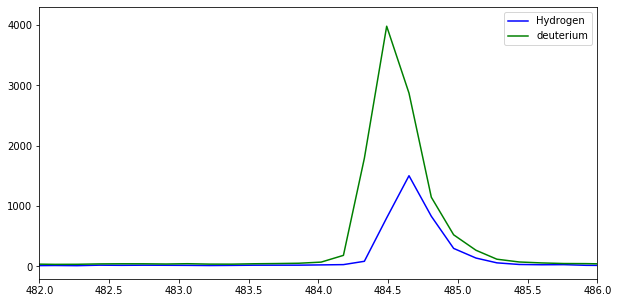

In [42]:
plt.plot(wl,h2,color = 'b',label = "Hydrogen")
plt.plot(wl,h3,color = 'g', label = 'deuterium')
plt.xlim(626,630)
plt.legend()
plt.show()

plt.plot(wl,h2,color = 'b', label = "Hydrogen")
plt.plot(wl,h3,color = 'g', label = 'deuterium')
plt.xlim(432,436)
plt.ylim(0,500)
plt.legend()
plt.show()

plt.plot(wl,h2,color = 'b',label = "Hydrogen")
plt.plot(wl,h3,color = 'g', label = 'deuterium')
plt.xlim(482,486)
plt.legend()
plt.show()

## Sodium

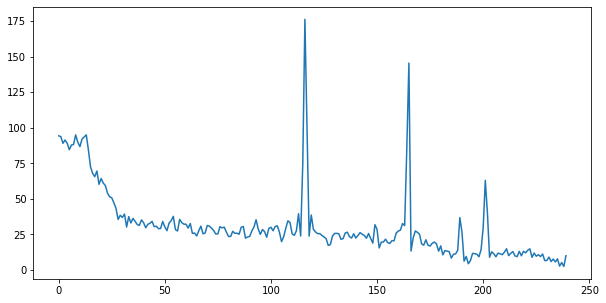

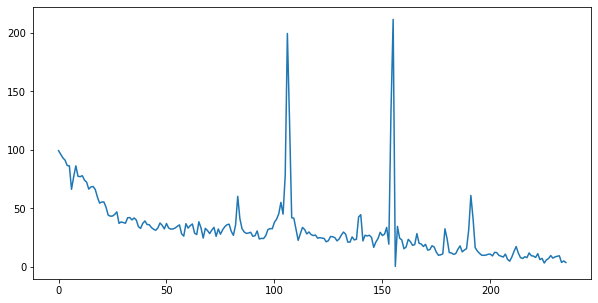

In [43]:
doublet = np.loadtxt('onetrue.csv',delimiter = ',', skiprows = 1)
doublet3 = np.loadtxt('threetrue.csv',delimiter = ',', skiprows = 1)

plt.plot(doublet[:,1],)
plt.show()

plt.plot(doublet3[:,1])
plt.show()

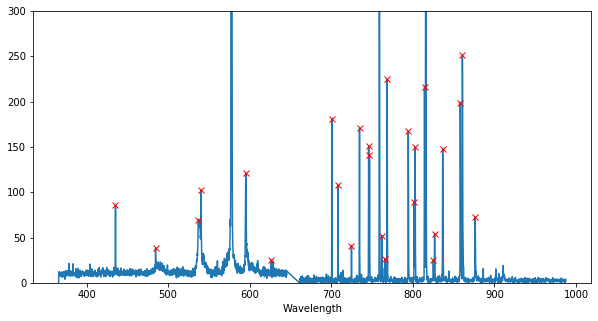

29


In [44]:
peaks3, _ = find_peaks(na, prominence = 20)

plt.plot(wl,na)
plt.plot(wl[peaks3],na[peaks3],'x',color = 'r')
plt.xlabel('Wavelength')
#plt.xlim(360,700)
plt.ylim(0,300)
plt.show()

print(len(wl[peaks3]))

0.21 2296158.526784689
0.1875 2063344.681729083
0.1388888888888889 1596653.4144433269
Slope = 9798951.816546733 . Intercept = 233369.24848947945


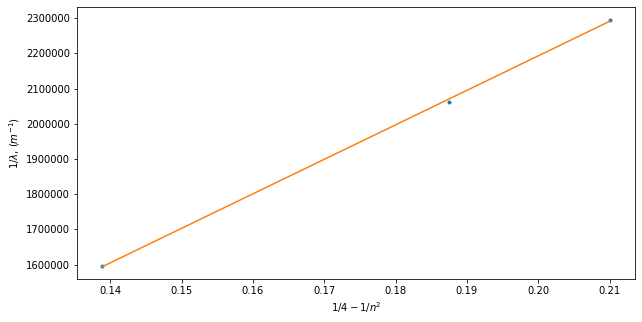

0.21 2296158.526784689
0.1875 2063344.681729083
0.1388888888888889 1596653.4144433269
Slope = 97989.51804234688 . Intercept = 1594334.7792012852


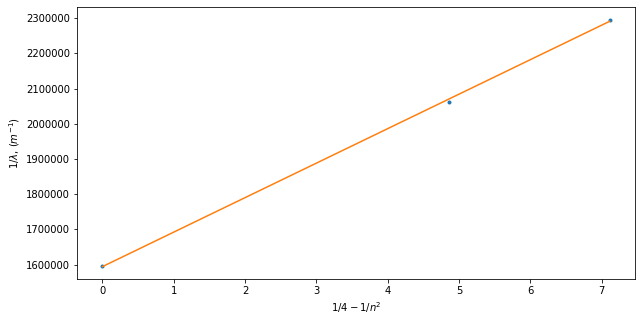

In [54]:
lambda_invna = np.empty(3)
balmerna = np.empty(3)
na_peak = [435.51,484.65,626.31]

for i in range(3):
    balmerna[i] = rydfunc(5-i)
    lambda_invna[i] = 1/(na_peak[i]*1e-9)
    print(balmerna[i],lambda_invna[i])
    

c3,cov3 = curve_fit(linf,balmerna,lambda_invna)
yoptna = linf(balmerna,c3[0],c3[1])
    
print('Slope =',c3[0],'. Intercept =', c3[1])
    
plt.plot(balmerna,lambda_invna,'.')
plt.plot(balmerna,yoptna)
plt.xlabel('$ 1/4 - 1/n^2 $')
plt.ylabel('$ 1/ \lambda $, ($m^{-1}$)')
plt.show()

#print(c1[0]/c2[0])

def ryd2(n):
    return ((11-1))**2 * (1/9 - 1/(n**2))

lambda_invna2 = np.empty(3)
balmerna2 = np.empty(3)
na_peak = [435.51,484.65,626.31]

for i in range(3):
    balmerna2[i] = ryd2(5-i)
    lambda_invna2[i] = 1/(na_peak[i]*1e-9)
    print(balmerna[i],lambda_invna2[i])
    

c4,cov4 = curve_fit(linf,balmerna2,lambda_invna2)
yoptna2 = linf(balmerna2,c4[0],c4[1])
    
print('Slope =',c4[0],'. Intercept =', c4[1])
    
plt.plot(balmerna2,lambda_invna2,'.')
plt.plot(balmerna2,yoptna2)
plt.xlabel('$ 1/4 - 1/n^2 $')
plt.ylabel('$ 1/ \lambda $, ($m^{-1}$)')
plt.show()

In [46]:
rh = (1/435.51e-9)/(1/4 - 1/9)

print(rh)
Z = 11

rh2 = (1/435.51e-9)/((Z-1)**2 * (1/1 - 1/9))

print(rh2)

16532341.392849762
25831.783426327755


In [47]:
sodium_peak = np.empty([len(wl[peaks3]),2])

for i in range(len(wl[peaks3])):
    sodium_peak[i,0] = wl[peaks3][i]
    sodium_peak[i,1] = h3[peaks3][i]
    
print(sodium_peak)

[[ 435.51         58.66666667]
 [ 484.65       2872.        ]
 [ 537.08         60.33333333]
 [ 540.44         71.        ]
 [ 577.35         32.66666667]
 [ 577.71         35.33333333]
 [ 595.15         80.        ]
 [ 626.31         95.        ]
 [ 700.63         30.66666667]
 [ 708.2          30.33333333]
 [ 724.71         31.66666667]
 [ 734.6          32.        ]
 [ 745.81         31.        ]
 [ 746.79         32.        ]
 [ 758.9          33.        ]
 [ 762.02         35.33333333]
 [ 765.79         30.        ]
 [ 768.37         32.66666667]
 [ 794.4          31.        ]
 [ 801.63         32.33333333]
 [ 802.65         32.33333333]
 [ 814.26         31.66666667]
 [ 815.85         34.33333333]
 [ 824.97         28.33333333]
 [ 826.61         35.33333333]
 [ 836.54         34.33333333]
 [ 858.12         31.        ]
 [ 860.67         31.        ]
 [ 876.26         31.66666667]]


## Nitrogen

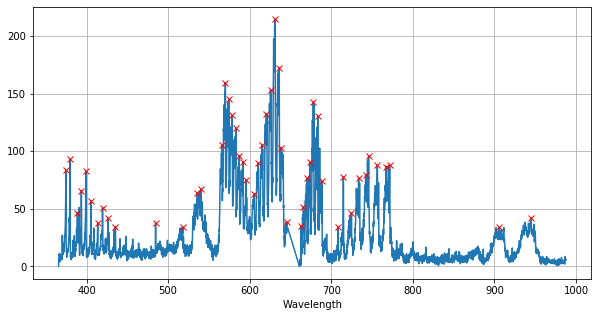

In [118]:
peaks4, _ = find_peaks(n2,prominence = 20, distance = 25)

plt.plot(wl,n2)
plt.plot(wl[peaks4],n2[peaks4],'x',color = 'r')
plt.xlabel('Wavelength')
#plt.xlim(360,480)
plt.grid()
plt.show()

In [119]:
nitrogen_peak = np.empty([len(wl[peaks4]),2])

for i in range(len(wl[peaks4])):
    nitrogen_peak[i,0] = wl[peaks4][i]
    nitrogen_peak[i,1] = n2[peaks4][i]
    
print(nitrogen_peak)

print(570.16-631.1)

[[374.68        83.33333333]
 [379.77        93.33333333]
 [388.81        46.66666667]
 [393.65        65.66666667]
 [399.19        82.66666667]
 [405.41        56.66666667]
 [413.69        37.66666667]
 [419.63        51.        ]
 [426.4         41.66666667]
 [435.34        34.33333333]
 [484.65        37.66666667]
 [517.75        34.        ]
 [535.53        63.66666667]
 [540.44        67.        ]
 [565.97       105.33333333]
 [570.16       159.33333333]
 [574.27       145.        ]
 [578.57       131.        ]
 [582.9        120.        ]
 [587.26        96.        ]
 [591.64        91.        ]
 [595.26        75.33333333]
 [605.68        63.        ]
 [610.13        89.66666667]
 [615.24       105.33333333]
 [620.34       132.33333333]
 [625.5        153.        ]
 [631.1        214.33333333]
 [636.13       172.33333333]
 [638.42       103.        ]
 [645.22        38.66666667]
 [662.89        35.        ]
 [665.86        51.66666667]
 [670.04        76.33333333]
 [674.08      

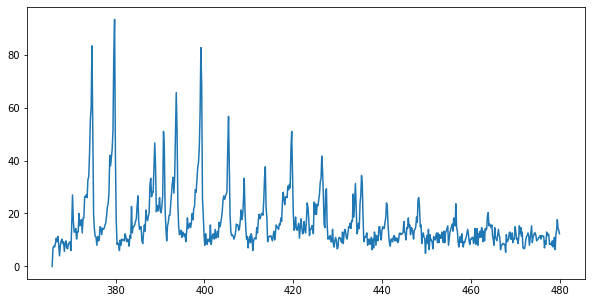

In [139]:
lambda_nit = []
int_nit = []

for i in range(len(n2)):
    if wl[i]<480:
        lambda_nit.append(wl[i])
        int_nit.append(n2[i])
    else:
        pass
    
plt.plot(lambda_nit,int_nit)
plt.show()

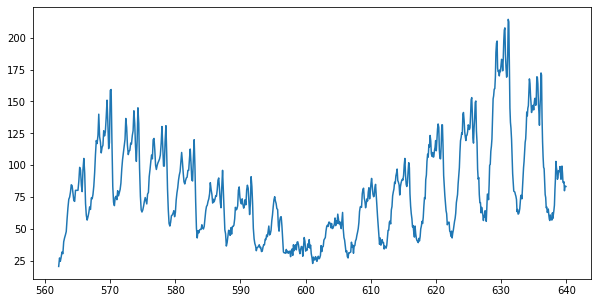

In [120]:
lambda_na = []
int_na = []

for i in range(len(n2)):
    if wl[i] > 562 and wl[i] < 640:
        lambda_na.append(wl[i])
        int_na.append(n2[i])
    else:
        pass
    
#print(lambda_na)
#print(int_na)

plt.plot(lambda_na,int_na)
plt.show()

[565.97, 570.16, 574.27, 578.57, 582.9, 587.26, 591.64, 595.26, 605.68, 610.13, 615.24, 620.34, 625.5, 631.1, 636.13, 638.42]
[105.33333333333333, 159.33333333333334, 145.0, 131.0, 120.0, 96.0, 91.0, 75.33333333333333, 63.0, 89.66666666666667, 105.33333333333333, 132.33333333333334, 153.0, 214.33333333333334, 172.33333333333334, 103.0]


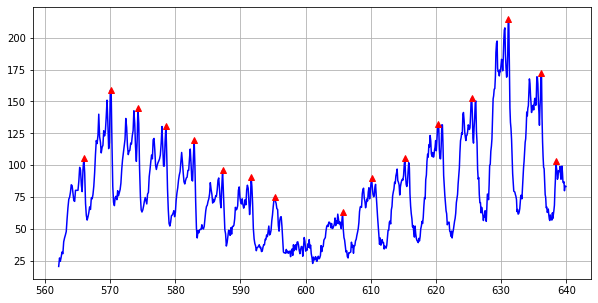

In [123]:
lambda_napeak = []
int_napeak = []

for i in range(len(n2[peaks4])):
    if wl[peaks4][i] > 565 and wl[peaks4][i] < 640:
        lambda_napeak.append(wl[peaks4][i])
        int_napeak.append(n2[peaks4][i])
    else:
        pass
    
print(lambda_napeak)
print(int_napeak)

plt.plot(lambda_na,int_na,color='b')
plt.plot(lambda_napeak,int_napeak,'^',color='r')
plt.grid()
plt.show()

In [122]:
delta_peak = []

for i in range(len(lambda_napeak)-1):
    delta_peak.append(1/lambda_napeak[i]*1e-9-1/lambda_napeak[i+1]*1e-9)
    
ave_lambda = np.average(delta_peak)
    
print(delta_peak)
print(ave_lambda)
print(np.std(delta_peak))

[1.298445919023364e-14, 1.2552462911845664e-14, 1.2941851596529063e-14, 1.283919899848998e-14, 1.2736849382672245e-14, 1.2606257134033269e-14, 1.0278845590824993e-14, 2.890132713252187e-14, 1.2041882857070256e-14, 1.3613003523728315e-14, 1.3362749492673154e-14, 1.3298192087591052e-14, 1.4186084186050243e-14, 1.2529216894576231e-14, 5.6387536474590196e-15]
1.3367408975086599e-14
4.589965462535674e-15


Dont re run the cell below. If you do, just remember the k-value, for 0-2 to 0-3 is 1345.29. and k-value for 0-3 to 0-4 is 1297.34

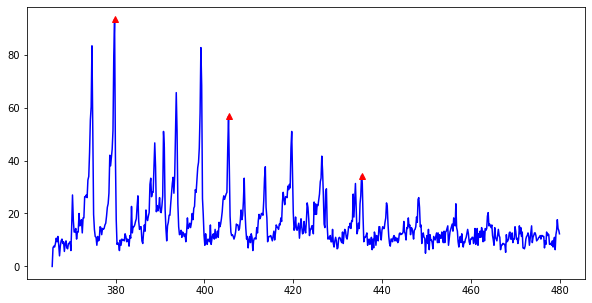

1800187715025.9294
0-2 - 0-3= 1345.2855453482312
1767815819765.107
0-3 - 0-4 = 1297.3373472304638


In [180]:
trans0_wl = [379.77,405.41,435.34]
trans0_i = [93.333,56.6667,34.33333]

plt.plot(lambda_nit,int_nit, color = 'b')
plt.plot(trans0_wl,trans0_i,'^',color = 'r')
plt.show()

c = 299792458

freq1 = (c/(1/(trans0_wl[0]) - 1/(trans0_wl[1]))) #this lambda here is wrong, it should be (1/lambda1 - 1/lambda2)
print(freq1)

Zn = 14

redm_n = (Zn*Zn/(2*Zn)**2) #amu

redm_kg = 1.6605e-26*redm_n #change the 26 here to 21 too get good K value


k1 = freq1**2 * redm_kg

print('0-2 - 0-3=',k1) 

freq2 = (c/(1/trans0_wl[1] - 1/trans0_wl[2])) #this lambda here is wrong, it should be (1/lambda1 - 1/lambda2)
print(freq2)

Zn = 14

redm_n = (Zn*Zn/(2*Zn)**2) #amu

redm_kg = 1.6605e-26*redm_n # same as here


k2 = freq2**2 * redm_kg

print('0-3 - 0-4 =',k2) 

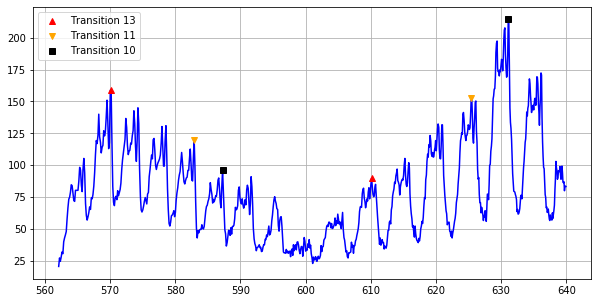

[42.5]


In [148]:
trans13_wl = [570.16,610.13]
trans13_i = [159.33333333333334,89.66666666666667]
trans11_wl = [582.9,625.4]
trans11_i = [120,153]
trans10_wl = [587.26,631]
trans10_i = [96,214.33333333333334]

plt.plot(lambda_na,int_na,color = 'b')
plt.plot(trans13_wl,trans13_i, '^', color = 'r', label = 'Transition 13')
plt.plot(trans11_wl,trans11_i, 'v', color = 'orange', label = 'Transition 11')
plt.plot(trans10_wl,trans10_i, 's', color = 'k', label = 'Transition 10')
plt.legend()
plt.grid()
plt.show()

print(np.diff(trans11_wl))

In [166]:
c = 299792458

freq = (c/(1/trans13_wl[0] - 1/trans13_wl[1])) #this lambda here is wrong, it should be (1/lambda1 - 1/lambda2)
print(freq)

Zn = 14

redm_n = (Zn*Zn/(2*Zn)**2) #amu

redm_kg = 1.6605e-26#*redm_n #same here. The k-value should be 1130.45


k = freq**2 * redm_kg

print(k) #spring constant of n2


2609189848569.4688
1130.4470901190364
